In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#Importing the dataset
maxtemp=pd.read_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\MaxTemperature\maxtemp.csv")

In [3]:
maxtemp

,Year,Month,maxtemp_past,maxtemp_pasttopast,MaxTemperature
0,2002,1,31.85,32.36,30.91
1,2002,2,35.65,33.19,34.26
2,2002,3,36.76,37.03,37.74
3,2002,4,38.33,40.63,40.22
4,2002,5,38.33,36.28,38.46
...,...,...,...,...,...
211,2019,8,29.42,30.14,30.14
212,2019,9,31.32,30.20,30.20
213,2019,10,33.12,29.70,29.70
214,2019,11,32.22,28.97,28.97


In [4]:
maxtemp.shape

(216, 5)

In [5]:
maxtemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                216 non-null    int64  
 1   Month               216 non-null    int64  
 2   maxtemp_past        216 non-null    float64
 3   maxtemp_pasttopast  216 non-null    float64
 4   MaxTemperature      216 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [6]:
#Creating correlation matrix for precipitation
corr_matrix=maxtemp.corr()
corr_matrix

,Year,Month,maxtemp_past,maxtemp_pasttopast,MaxTemperature
Year,1.000000e+00,4.861859e-15,0.004891,-0.006694,0.005800
Month,4.861859e-15,1.000000e+00,-0.550573,-0.557472,-0.550159
maxtemp_past,4.891057e-03,-5.505732e-01,1.000000,0.915769,0.916081
maxtemp_pasttopast,-6.694044e-03,-5.574721e-01,0.915769,1.000000,0.911580
MaxTemperature,5.800439e-03,-5.501590e-01,0.916081,0.911580,1.000000


In [7]:
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

In [8]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
maxtemp=maxtemp.drop(['Year','Month'],axis=1)

In [10]:
maxtemp.shape

(216, 3)

In [11]:
X=maxtemp.drop('MaxTemperature',axis=1)
y=maxtemp.MaxTemperature

In [12]:
X

,maxtemp_past,maxtemp_pasttopast
0,31.85,32.36
1,35.65,33.19
2,36.76,37.03
3,38.33,40.63
4,38.33,36.28
...,...,...
211,29.42,30.14
212,31.32,30.20
213,33.12,29.70
214,32.22,28.97


In [13]:
y

0      30.91
1      34.26
2      37.74
3      40.22
4      38.46
       ...  
211    30.14
212    30.20
213    29.70
214    28.97
215    28.42
Name: MaxTemperature, Length: 216, dtype: float64

In [14]:
X.shape

(216, 2)

In [15]:
y.shape

(216,)

In [16]:
#Creating Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [17]:
X_train,y_train=np.array(X_train),np.array(y_train)

### Linear Regressor

In [18]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [19]:
li=LinearRegression()

In [20]:
li.fit(X_train,y_train)

LinearRegression()

In [21]:
#Prediction of values
Lir_ypred= li.predict(X_test)
Lir_ypred

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([30.82758689, 28.8399647 , 29.93260121, 31.76079788, 34.94883261,
       30.38483783, 36.79112314, 28.94143286, 30.54393682, 30.28042219,
       30.64621258, 29.85204201, 30.99979142, 33.76993057, 33.73362083,
       34.0386443 , 31.64902582, 39.60435226, 29.23474249, 38.72951946,
       28.53968542, 32.23230211, 30.93501896, 31.76848082, 32.22281453,
       36.46125492, 37.96625266, 32.76514073, 30.99444569, 30.00624226,
       32.81409158, 36.21960349, 29.54193991, 34.62769588, 34.68602256,
       29.9511468 , 29.19951617, 36.91174715, 31.47056492, 34.47865194,
       31.20571802, 31.64489189, 29.49206098, 39.59814741])

In [22]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
#print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 1.8902623554544036
Root Mean Squared Error: 1.3748681229319428


In [23]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.7796982060764113

### Lasso Regressor

In [24]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [25]:
Lass_ypred= lass.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [26]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
#print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 1.8902789963822892
Root Mean Squared Error: 1.3748741747455617


In [27]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.7796962666491909

### Ridge Regressor

In [28]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [29]:
rid_ypred= rid.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [30]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
#print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 1.8902623141040413
Root Mean Squared Error: 1.374868107894005


In [31]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.7796982108956148

### Decision Tree Regressor

In [32]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [33]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
dt_ypred= dt.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [35]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
#print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 2.557861363636362
Root Mean Squared Error: 1.5993315364977838


In [36]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.7018924672594105

### KNeighbour Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=12)
kn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=12)

In [38]:
kn1_pred=kn.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [39]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
#print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 1.5901303345959585
Root Mean Squared Error: 1.2610037012617998


In [40]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.8146772778535312

### SVR Regressor

In [41]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [42]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
#print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 1.6797975471102036
Root Mean Squared Error: 1.2960700394308187


In [43]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

0.8042269571792525

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train);

In [46]:
rf_pred=rf.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [47]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
#print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 1.581658889090889
Root Mean Squared Error: 1.2576402065340027


In [48]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.8156645877031442

### Bayes Regressor

In [49]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)

BayesianRidge()

In [50]:
br_pred=br.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(


In [51]:
print('Mean squared Error:',mean_squared_error(y_test,br_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,br_pred)))
print('R2_Score:',r2_score(y_test,br_pred))

Mean squared Error: 1.887337239181422
Root Mean Squared Error: 1.3738039303996121
R2_Score: 0.7800391155594327


In [52]:
bayes_r2_score=r2_score(y_test,br_pred)
bayes_r2_score

0.7800391155594327

In [53]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

C:\Users\HP\AppData\Local\Temp\ipykernel_15524\2049796945.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


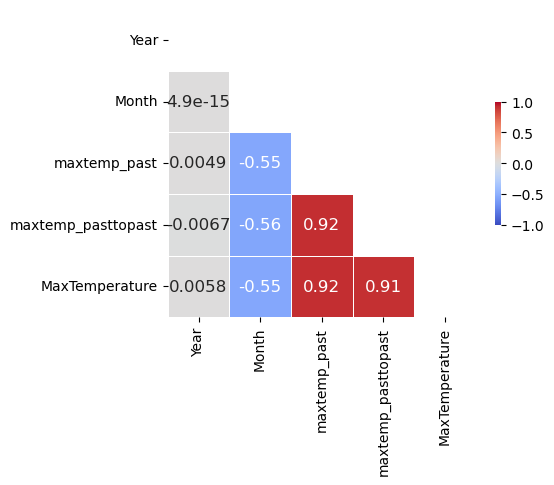

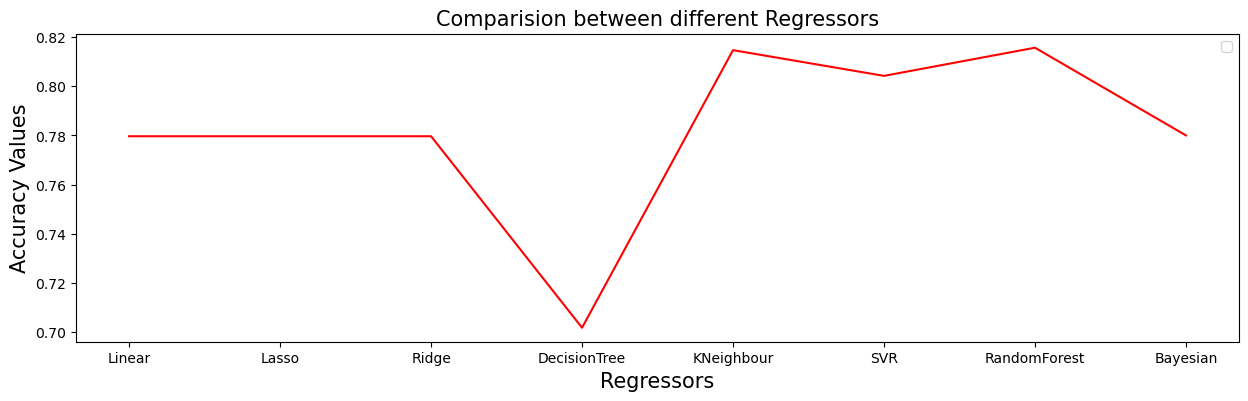

In [54]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


## KNeighbour Regressor is sutaible for Precipitation with accuracy of 88.36% followed by RandomForest Regressorwith accuracy of 86%

In [55]:
maxtemp2020=pd.read_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\MaxTemperature\maxtemp2020.csv")

In [56]:
maxtemp2020=maxtemp2020.drop(['Year','Month'],axis=1)

In [57]:
maxtemp2020=maxtemp2020.iloc[:,:].values

In [58]:
maxtemp2020

array([[30.7 , 29.82],
       [34.78, 33.2 ],
       [37.22, 36.84],
       [40.48, 39.81],
       [39.79, 39.48],
       [32.45, 31.45],
       [30.27, 29.46],
       [30.14, 29.42],
       [30.2 , 31.32],
       [29.7 , 33.12],
       [28.97, 32.22],
       [28.42, 30.31]])

In [59]:
maxtemp2020_pred=[]

In [60]:
#Using Kneighbour regressor for prediction
maxtemp2020_pred=kn.predict(maxtemp2020)

In [61]:
maxtemp2020_pred

array([30.32583333, 34.0875    , 37.6375    , 39.14333333, 39.3275    ,
       31.12083333, 30.16083333, 30.36833333, 30.29916667, 30.95083333,
       30.08916667, 29.5675    ])

In [62]:
#Predicting for 2020
maxtemp_data=pd.DataFrame(data=maxtemp2020_pred)
maxtemp_data

,0
0,30.325833
1,34.087500
2,37.637500
3,39.143333
4,39.327500
5,31.120833
6,30.160833
7,30.368333
8,30.299167
9,30.950833


In [65]:
#Exporting the predictions of 2020 into csv file
maxtemp_data.to_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\MaxTemperature\2020maxtemp.csv")
